In [1]:
import sys
import os
import glob 
from mido import MidiFile
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from mappings import MIDI_MAP, BW_MAP


def count_notes(midi_path, print_verbose = False):
    
    # read midi file
    midi_file = MidiFile(midi_path) 
    
    # init verbose text 
    verbose_msg = ""
    verbose_msg += "Midi-Datei: " + str(midi_path)
    verbose_msg += "\nDie Midi-Datei hat " + str(len(midi_file.tracks)) + " track(s)."

    # init note count 
    total_count = [0] * 130
    track_count = [0] * 130

    # process midi tracks
    for i, track in enumerate(midi_file.tracks):
        verbose_msg += "\n"
        verbose_msg += "\nTrack {}: {}".format(i + 1, track.name)
        
        track_count = [0] * 130

        # process messages per track
        for j, msg in enumerate(track):
            
            # skip meta messages
            if msg.is_meta:
                continue
            
            # skip all except note on (e.g. control changes, program changes
            if msg.dict()['type'] != 'note_on':
                continue
            
            # add note on note to track count
            track_count[int(msg.dict()['note'])] += 1
        
        # add track count to total count
        verbose_msg += "\nTrack count (MIDI indices): " + str(track_count)
        for idx, elem in enumerate(track_count):
            total_count[idx] += elem

    verbose_msg += "\n"
    verbose_msg += "\n------------------- "
    verbose_msg += "\n--- Total Count --- "
    verbose_msg += "\n------------------- "
    verbose_msg += "\n"
    verbose_msg += "\n{:<16} {:<16}           {:<16} ".format("Note", "MIDI-Note","Note Count")
    verbose_msg += "\n######################################################"
    
    # log total count
    total_count_df = []
    for idx, note_count in enumerate(total_count):
        
        # skip non-notes 
        if idx < 21 or idx > 128: 
            continue
        
        verbose_msg += "\n{:<16} MIDI-Note {:<16} {:<16} ".format(MIDI_MAP[idx], idx,note_count)
        total_count_df.append({"Note": MIDI_MAP[idx], "MIDI-Note": idx, "Anzahl": note_count})
    
    
    if print_verbose:
        print(verbose_msg)
        
    # save verbose message
    with open(os.path.join(os.path.dirname(midi_path), os.path.basename(midi_path).split(".")[0] + "_count.txt"), "w") as count_file:
        count_file.write(verbose_msg)
    
    
    return pd.DataFrame(total_count_df)


In [2]:
def generate_plot(total_count_df, save_path, max_cnt = 800, plot_mean = True):
    
    # exclude all notes not on regular keys 
    total_count_df = total_count_df[total_count_df["MIDI-Note"] <= 108]
    
    # calculate mean value 
    mean_key_midi = sum(total_count_df["MIDI-Note"] * total_count_df["Anzahl"]) / sum(total_count_df["Anzahl"])
    mean_key_zero_ref = mean_key_midi - 21
    print()
    print("Durchschnitts-MIDI-Note:", mean_key_midi)
    print("Durchschnitts-Note-Null-Referenz:", mean_key_zero_ref)
    upper_mean_key = int(mean_key_midi) + 1
    if upper_mean_key >= 108:
        upper_mean_key = 108
    print("Durchschnitt-Note zwischen:", total_count_df[total_count_df["MIDI-Note"] == int(mean_key_midi)]["Note"].item(), "und", total_count_df[total_count_df["MIDI-Note"] == upper_mean_key]["Note"].item())

    # setup plot 
    fig, ax = plt.subplots(2,1, figsize = (20,10), dpi = 120)
    
    # barplot 
    bars = total_count_df.plot(x = "Note", y = "Anzahl", kind = "bar", linewidth = 2, edgecolor = "black", color = "white", width = 1, ax = ax[0])
    ax[0].set_title(midi_path, y = 1.05)
    ax[0].tick_params(axis='y', which='major', labelsize=14)
    ax[0].set_ylabel("Häufigkeit", fontdict={"size":16})
    ax[0].set_ylim((0,max_cnt))
    #ax[0].axes.xaxis.set_visible(False)
    #ax[0].axes.xaxis.set_ticks([])
    ax[0].axes.xaxis.get_label().set_visible(False)
    ax[0].axes.xaxis.set_ticklabels([]) 
    ax[0].get_legend().remove()
    ax[0].set_xlim(-0.5,87.5)
    
    # mean plot 
    if plot_mean:
        ax[0].plot(mean_key_zero_ref,max_cnt-50,"*",markersize = 18, color = "black")
        ax[0].vlines(mean_key_zero_ref, 0, max_cnt-50, colors="black", linestyles='dashed')
    
    # bar colors 
    bars = ax[0].containers
    for idx, elem in total_count_df.iterrows():
        if BW_MAP[elem["MIDI-Note"]] == "b":
            bars[0][idx].set_color("darkgray")
            bars[0][idx].set_edgecolor("black")

    # keys
    img = mpimg.imread(os.path.join(sys.path[0], "klaviatur_mit_punkt.png"))
    ax[1].imshow(img)
    ax[1].axes.xaxis.set_visible(False)
    ax[1].axes.yaxis.set_visible(False)
    pos_clav=ax[1].get_position()
    pos_clav.y0+=0.147
    pos_clav.y1+=0.147
    ax[1].set_position(pos_clav)
    
    # save to disk 
    plt.savefig(save_path, bbox_inches='tight')



Midi-Datei: ./midis/test_midi.mid
Die Midi-Datei hat 1 track(s).

Track 1: Piano right 
Track count (MIDI indices): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 3, 0, 17, 42, 9, 57, 13, 64, 11, 66, 25, 35, 46, 20, 42, 11, 61, 110, 18, 104, 63, 161, 107, 69, 129, 83, 119, 48, 191, 132, 69, 118, 135, 201, 87, 115, 170, 164, 218, 47, 301, 195, 67, 116, 90, 133, 78, 16, 39, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

------------------- 
--- Total Count --- 
------------------- 

Note             MIDI-Note                  Note Count       
######################################################
A0               MIDI-Note 21               0                
A#0/Bb0          MIDI-Note 22               0                
B0               MIDI-Note 23               0                
C1               MIDI-Note 24               0              

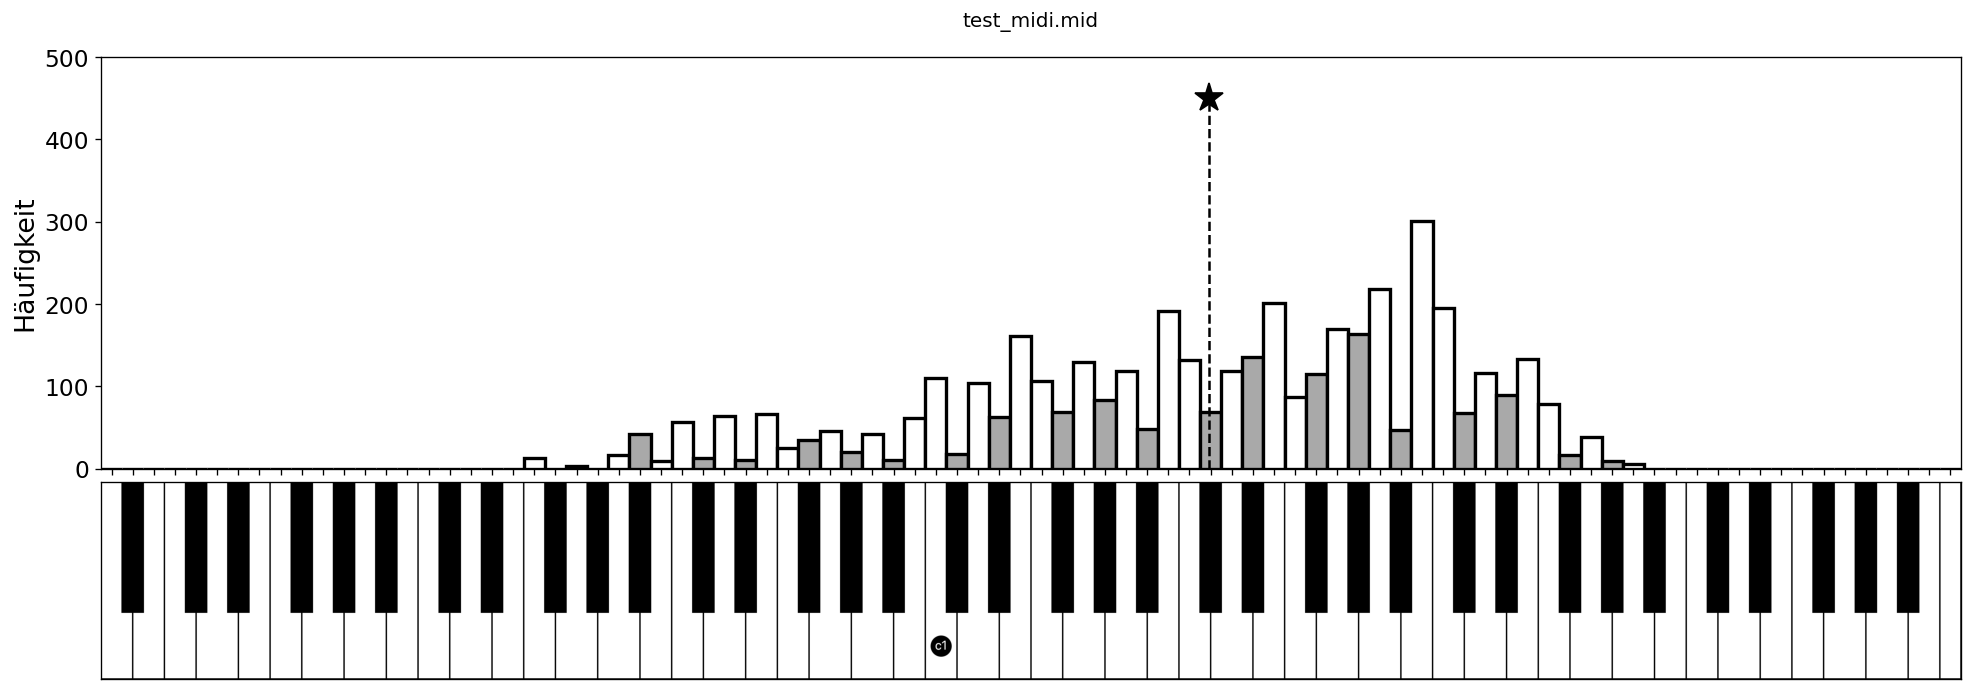

In [3]:
midi_paths = glob.glob(os.path.join(sys.path[0], "midis/*.mid"))

max_cnt = 500
plot_mean = True

for midi_path in midi_paths:
    total_count_df = count_notes(midi_path, True)
    generate_plot(total_count_df, os.path.join(os.path.dirname(midi_path), os.path.basename(midi_path).split(".")[0] + "_hist.png"), max_cnt, plot_mean)
    print()
    